# Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. 

Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import pandas as pd

In [3]:
rats = pd.read_csv('./rats.txt', delimiter='\t')

In [4]:
rats.head()

,lifespan,diet
0,105,restricted
1,193,restricted
2,211,restricted
3,236,restricted
4,302,restricted


In [6]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan'].values
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan'].values

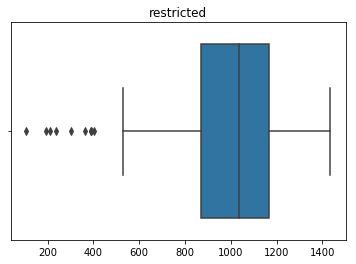

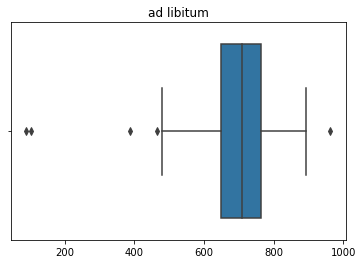

In [7]:
plt.title('restricted')
sns.boxplot(x= x1)
plt.show()
plt.title('ad libitum')
sns.boxplot(x= x2)

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_antialiased': True,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x7f4d7bafecc0>,
 '_clipon': True,
 '_clippath': None,
 '_color': 'black',
 '_contains': None,
 '_dashOffset': None,
 '_dashSeq': None,
 '_dashcapstyle': 'butt',
 '_dashjoinstyle': 'round',
 '_drawstyle': 'default',
 '_gid': None,
 '_in_layout': True,
 '_invalidx': False,
 '_invalidy': False,
 '_label': '_line1',
 '_linestyle': '-',
 '_linestyles': None,
 '_linewidth': 1.0,
 '_marker': <matplotlib.markers.MarkerStyle at 0x7f4d7b3420f0>,
 '_markeredgecolor': 'auto',
 '_markeredgewidth': 1.0,
 '_markerfacecolor': 'auto',
 '_markerfacecoloralt': 'none',
 '_markersize': 6.0,
 '_markevery': None,
 '_mouseover': False,
 '_oid': 0,
 '_path': Path(array([[  1., 648.],
        [  1., 479.]]), None),
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_remove_method': <function list.remove>,
 '_sketch': None,
 '_snap': None,
 '_

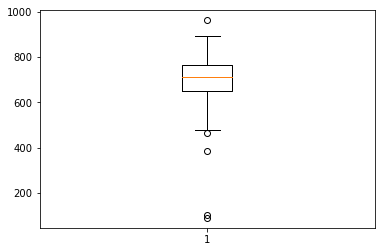

In [17]:
plt.boxplot(x2)['whiskers'][0].__dict__

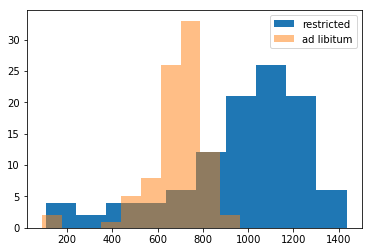

In [19]:
plt.hist(x1, label='restricted')
plt.hist(x2, alpha=0.5, label='ad libitum')
plt.legend(loc='best')

# Нормальность
Проверим нормальность выборок: 

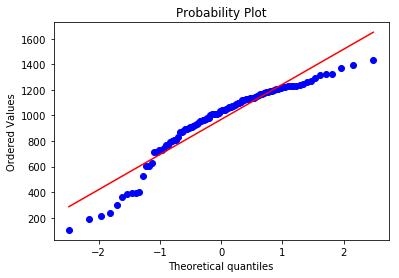

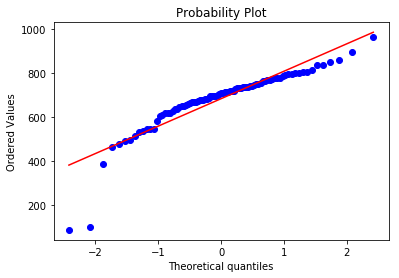

In [20]:
_ = st.probplot(x1, plot=plt)
plt.show()
_ = st.probplot(x2, plot=plt)

In [22]:
print (st.shapiro(x1))
print (st.shapiro(x2))
print (st.shapiro(rats['lifespan'].values))


(0.9036345481872559, 1.1565858812900842e-06)
(0.8444006443023682, 3.081509092339729e-08)
(0.9769284725189209, 0.0026380273047834635)


Нормальность в обоих случаях отвергается. Попробуем исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой).

In [23]:
x1c = x1[np.where(x1>=400)[0]]
x2c = x2[np.where(x2>=400)[0]]

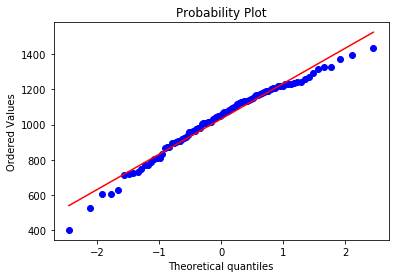

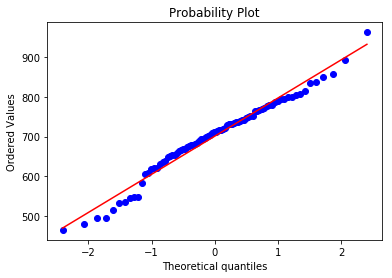

In [24]:
_ = st.probplot(x1c, plot=plt)
plt.show()
_ = st.probplot(x2c, plot=plt)

In [26]:
print (st.shapiro(x1c))
print (st.shapiro(x2c))



(0.9738006591796875, 0.04921640083193779)
(0.9765744209289551, 0.11983636021614075)


Усечённые выборки можно считать практически нормальными.

# Сравнение средних
$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

$H_1$: крысы на строгой диете живут дольше.



In [29]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(x1c*1.0,x2c*1.0, alternative='larger', usevar='unequal')

(14.527701019046814, 3.941182274101304e-30, 141.33154919379604)

In [30]:
ttest_ind(x1c*1.0,x2c*1.0, alternative='two-sided', usevar='unequal')

(14.527701019046814, 7.882364548202608e-30, 141.33154919379604)

На полных выборках:

In [31]:
ttest_ind(x1*1.0,x2*1.0, alternative='larger', usevar='unequal')

(9.161061040974156, 1.4580405594293205e-16, 154.9404956691433)

In [32]:
ttest_ind(x1*1.0,x2*1.0, alternative='two-sided', usevar='unequal')

(9.161061040974156, 2.916081118858641e-16, 154.9404956691433)

**Weindruch R., Walford R.L. The Retardation of Aging and Disease by Dietary Restriction. Springfield: Charles C. Thomas, 1988.**